# 1)Quantification of the data in ProtVSTranscript dataframe
In this notebook, we are reading the frame previously generated that contains both transcriptomics data and proteomics data. The values for the transcriptomics are given in FPKM. For now, I am only treating proteomics data. We draw useful graphs that allow to quantify the data present. Notice that when we first use linear graphs, this are not very useful due to the spread of the data. In the second seires of graphs we use log scale, which shows that the data is mostly centered around 10^6 to 10^7 level


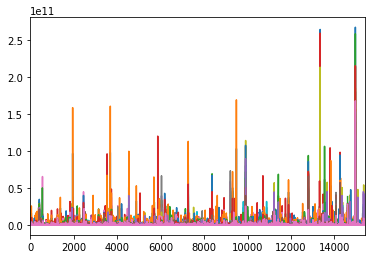

,Adrenal gland_transcription,Appendix_transcription,Brain_transcription,Colon_transcription,Duodenum_transcription,Endometrium_transcription,Esophagus_transcription,Fallopian tube_transcription,Fat_transcription,Gallbladder,...,Smooth muscle_translation,Prostate_translation,Appendix_translation,Pancreas_translation,Ovary_translation,Placenta_translation,Rectum_translation,Fat_translation,Lymph node_translation,Salivary gland_translation
0,8.300694e+06,3.282850e+05,7.492897e+06,14311241.43,60855740.95,2.974373e+06,0.00,32627565.46,0.00,16383977.40,...,898530.0,88232000.0,67666.0,0.0,606640.0,12509000.0,6871200.0,0.0,3099800.0,538040000.0
1,1.322339e+08,2.289544e+07,4.387436e+07,50154518.50,97504770.86,7.904211e+07,67469938.61,94959685.75,53606808.28,57771405.55,...,11468000.0,44232000.0,4719200.0,666270000.0,47229000.0,161240000.0,98918000.0,41963000.0,53504000.0,178140000.0


In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import requests, sys #to communicate with Ensembl servers
import json 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
newFrame=pd.read_csv('ProtVSTranscript.csv')


subFrame=newFrame.iloc[:,2:-1].copy()

#subFrame.dtypes

subFrame.plot()
plt.gca().legend_.remove()
plt.savefig('Concentration.png')
plt.show()
subFrame.head(2)

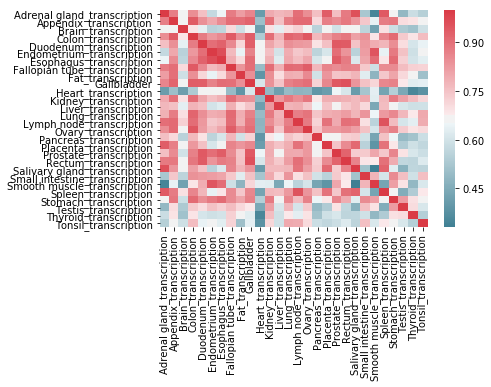

In [59]:
import seaborn as sns

corr = subFrame.loc[:,subFrame.dtypes == 'float64'].corr()
sns_plot=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('CorrelationHeatmapAll.png', dpi=400)

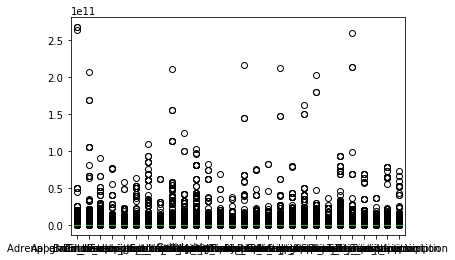

In [68]:
subFrame= subFrame.iloc[:,0:28]
# for column in subFrame:
#     plt.figure()
#     subFrame.plot(kind='box')
BoxPlot=subFrame.plot(kind='box')
fig = BoxPlot.get_figure()
fig.savefig("BoxPlot29.png")


[Text(0, 0, 'Adrenal gland_transcription'),
 Text(0, 0, 'Appendix_transcription'),
 Text(0, 0, 'Brain_transcription'),
 Text(0, 0, 'Colon_transcription'),
 Text(0, 0, 'Duodenum_transcription'),
 Text(0, 0, 'Endometrium_transcription'),
 Text(0, 0, 'Esophagus_transcription'),
 Text(0, 0, 'Fallopian tube_transcription'),
 Text(0, 0, 'Fat_transcription'),
 Text(0, 0, 'Gallbladder'),
 Text(0, 0, 'Heart_transcription'),
 Text(0, 0, 'Kidney_transcription'),
 Text(0, 0, 'Liver_transcription'),
 Text(0, 0, 'Lung_transcription'),
 Text(0, 0, 'Lymph node_transcription'),
 Text(0, 0, 'Ovary_transcription'),
 Text(0, 0, 'Pancreas_transcription'),
 Text(0, 0, 'Placenta_transcription'),
 Text(0, 0, 'Prostate_transcription'),
 Text(0, 0, 'Rectum_transcription'),
 Text(0, 0, 'Salivary gland_transcription'),
 Text(0, 0, 'Small intestine_transcription'),
 Text(0, 0, 'Smooth muscle_transcription'),
 Text(0, 0, 'Spleen_transcription'),
 Text(0, 0, 'Stomach_transcription'),
 Text(0, 0, 'Testis_transcriptio

[(10, 611983661660.3796)]

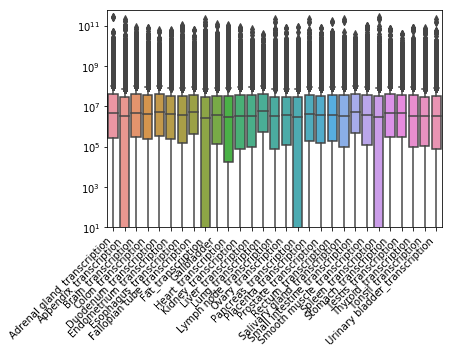

In [34]:
TransFrame= subFrame.iloc[:,0:29]
# for column in subFrame:
#     plt.figure()
#     subFrame.plot(kind='box')




chart = sns.boxplot( data=TransFrame)
chart.set_yscale('log')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.set(ylim=(10, 10^10))
# chart.savefig('TrsnscriptionBoxPlot', dpi=400)
figure=chart.get_figure()    
figure.savefig('TrsnscriptionBoxPlot.png', dpi=400, transparent=True, bbox_inches='tight')

[Text(0, 0, 'Liver_translation'),
 Text(0, 0, 'Spleen_translation'),
 Text(0, 0, 'Stomach_translation'),
 Text(0, 0, 'Brain_translation'),
 Text(0, 0, 'Lung_translation'),
 Text(0, 0, 'Testis_translation'),
 Text(0, 0, 'Duodenum_translation'),
 Text(0, 0, 'Small intestine_translation'),
 Text(0, 0, 'Urinary bladder_translation'),
 Text(0, 0, 'Gall bladder'),
 Text(0, 0, 'Esophagus_translation'),
 Text(0, 0, 'Heart_translation'),
 Text(0, 0, 'Thyroid_translation'),
 Text(0, 0, 'Endometrium_translation'),
 Text(0, 0, 'Colon_translation'),
 Text(0, 0, 'Fallopian tube_translation'),
 Text(0, 0, 'Kidney_translation'),
 Text(0, 0, 'Smooth muscle_translation'),
 Text(0, 0, 'Prostate_translation'),
 Text(0, 0, 'Appendix_translation'),
 Text(0, 0, 'Pancreas_translation'),
 Text(0, 0, 'Ovary_translation'),
 Text(0, 0, 'Placenta_translation'),
 Text(0, 0, 'Rectum_translation'),
 Text(0, 0, 'Fat_translation'),
 Text(0, 0, 'Lymph node_translation'),
 Text(0, 0, 'Salivary gland_translation')]

[(1, 608406037799.5359)]

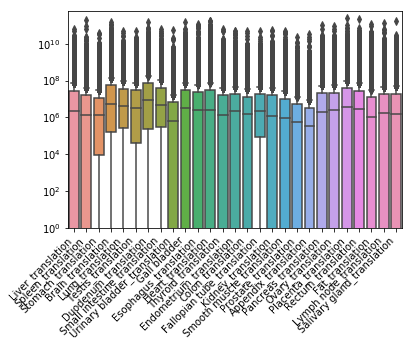

In [39]:
TransFrame= subFrame.iloc[:,30:60]
# for column in subFrame:
#     plt.figure()
#     subFrame.plot(kind='box')




chart = sns.boxplot( data=TransFrame)
chart.set_yscale('log')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
chart.set(ylim=(1, 10^10))
# chart.savefig('TrsnscriptionBoxPlot', dpi=400)
figure=chart.get_figure()    
figure.savefig('TranslationBoxPlot.png', dpi=400, transparent=True, bbox_inches='tight')

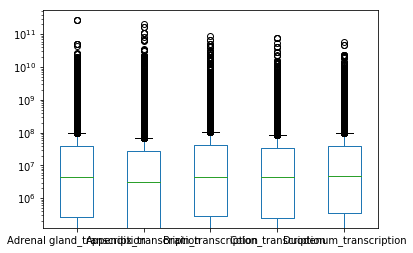

In [66]:
TransFrame= subFrame.iloc[:,0:5]
# for column in subFrame:
#     plt.figure()
#     subFrame.plot(kind='box')
BoxPlot=TransFrame.plot(kind='box')
BoxPlot.set_yscale('log')
fig = BoxPlot.get_figure()
fig.savefig("BoxPlotLog5.png")

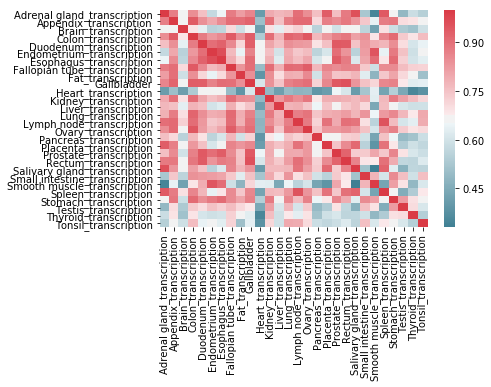

In [60]:

corr = TransFrame.loc[:,TransFrame.dtypes == 'float64'].corr()
sns_plot=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('CorrelationHeatmap.png', dpi=400)

In this  part, we used the pandas Corr() to find the correlation between each variable in the matrix and plot this using Seaborn’s Heatmap function, specifying the labels and the Heatmap colour range. Hart transcriptomics seems for some reason poorly correlated to the rest of the data, which as a whole is highly correlated ( red colour, Tonsil seems less correlated too).